In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import numpy as np
import scipy.stats as st
from pprint import pprint
# from config import api_key
from config import gkey
from citipy import citipy
from datetime import datetime

api_key = '8b1a6a5812e1f7cd158b59f1a5c965d5'

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

# Perform API Calls

In [6]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

latitudes = []
longitudes = []
temp = []
humidity = []
clouds = []
city_list = []
date = []
country = []
wind = []

# Set base URL and other perams
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
unit = '&units=Imperial'

record = 1
set = 1

# Loop through list of cities
for city in cities:

    # Build query URL
    query_url = base_url + city + unit + '&appid=' + api_key

    # If the URL doesn't exist, it will skip
    try:
    
    # Make request using query URL
        response = requests.get(query_url).json()
        
        # If the info cannot be found, program will skip
        try:
            
            # Navigate json and save weather/city info into lists for each city
            city_list.append(response['name'])
            latitudes.append(response['coord']['lat'])
            longitudes.append(response['coord']['lon'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])

            print(f"Processing Record {record} of Set {set} | {city}")

        except KeyError:
            print(f"Info not found. Skipping...")

    except KeyError:
        print(f"City {city} not found. Skipping...")

    # When the loop reaches the API limit, the program sleeps and resets    
    record += 1
    if record == 21:
        time.sleep(1)
        record == 0 
        set += 1


Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | henties bay
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | moranbah
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | kokkola
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | rabo de peixe
Processing Record 16 of Set 1 | owerri
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | inhambane
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 2 | inuvik
Processing Record 22 of Set 2 | chuy
Processing Record 23 of Set 2 | kapaa
Processing Record 24 of Set 2 | sao filipe
Proces

Processing Record 204 of Set 2 | yumen
Processing Record 205 of Set 2 | bandarbeyla
Processing Record 206 of Set 2 | souillac
Processing Record 207 of Set 2 | thunder bay
Processing Record 208 of Set 2 | mezhdurechensk
Processing Record 209 of Set 2 | presidencia roque saenz pena
Processing Record 210 of Set 2 | kidal
Processing Record 211 of Set 2 | luangwa
Processing Record 212 of Set 2 | saint-joseph
Processing Record 213 of Set 2 | uyemskiy
Processing Record 214 of Set 2 | bereda
Processing Record 215 of Set 2 | lorengau
Processing Record 216 of Set 2 | padang
Processing Record 217 of Set 2 | bonavista
Processing Record 218 of Set 2 | broome
Info not found. Skipping...
Processing Record 220 of Set 2 | fayaoue
Processing Record 221 of Set 2 | havre-saint-pierre
Info not found. Skipping...
Processing Record 223 of Set 2 | husavik
Processing Record 224 of Set 2 | bonthe
Processing Record 225 of Set 2 | anta
Processing Record 226 of Set 2 | chifeng
Processing Record 227 of Set 2 | ahip

Processing Record 403 of Set 2 | jinchang
Processing Record 404 of Set 2 | diffa
Processing Record 405 of Set 2 | turukhansk
Processing Record 406 of Set 2 | rochegda
Info not found. Skipping...
Processing Record 408 of Set 2 | batagay-alyta
Processing Record 409 of Set 2 | alta floresta
Processing Record 410 of Set 2 | leningradskiy
Info not found. Skipping...
Processing Record 412 of Set 2 | awbari
Processing Record 413 of Set 2 | callaway
Processing Record 414 of Set 2 | port keats
Processing Record 415 of Set 2 | puerto penasco
Processing Record 416 of Set 2 | vostok
Processing Record 417 of Set 2 | anchorage
Processing Record 418 of Set 2 | altay
Processing Record 419 of Set 2 | hovd
Processing Record 420 of Set 2 | shima
Processing Record 421 of Set 2 | ilesha
Processing Record 422 of Set 2 | antigonish
Processing Record 423 of Set 2 | kununurra
Processing Record 424 of Set 2 | shumikha
Processing Record 425 of Set 2 | denpasar
Processing Record 426 of Set 2 | koutiala
Processing

Processing Record 602 of Set 2 | anadyr
Processing Record 603 of Set 2 | ornskoldsvik
Processing Record 604 of Set 2 | vardo
Processing Record 605 of Set 2 | buala
Processing Record 606 of Set 2 | muleba
Processing Record 607 of Set 2 | irbit
Processing Record 608 of Set 2 | taltal
Processing Record 609 of Set 2 | adilabad
Processing Record 610 of Set 2 | dzhankoy
Processing Record 611 of Set 2 | harindanga
Processing Record 612 of Set 2 | nouadhibou
Processing Record 613 of Set 2 | banjarmasin
Processing Record 614 of Set 2 | kungurtug
Processing Record 615 of Set 2 | jimma
Processing Record 616 of Set 2 | vestmannaeyjar
Processing Record 617 of Set 2 | mareeba


In [7]:
data = {'City' : city_list, 'Country' : country, 
        'Lat' : latitudes, 'Lng' : longitudes,
        'Max Temp' : temp, 'Humidity' : humidity, 
        'Cloudiness' : clouds, 'Wind Speed' : wind}

weather_df = pd.DataFrame(data)

weather_df.to_csv('../Output_Data/Weather_Data.csv')

weather_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,-33.02,27.91,68.00,94,42,2.24
1,Saint-Philippe,RE,-21.36,55.77,80.60,83,75,19.46
2,Ushuaia,AR,-54.80,-68.30,53.60,71,75,4.70
3,Hithadhoo,MV,-0.60,73.08,83.93,69,1,12.46
4,Henties Bay,NA,-22.12,14.28,61.00,96,0,1.99


# Temperature

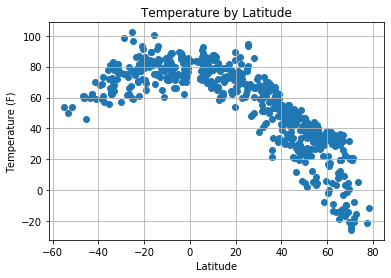

In [8]:
plt.scatter(latitudes, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude')
plt.grid(True)
plt.savefig('../Output_Data/lat_temp.png')

#### Oberservation:
Temperature decreases as distance from the equator (x=0) increases. 

# Humidity

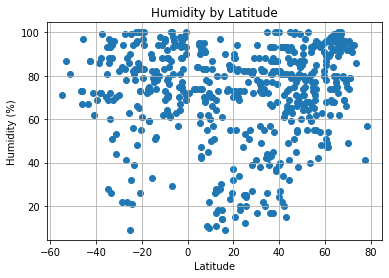

In [9]:
plt.scatter(latitudes, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Latitude')
plt.grid(True)
plt.savefig('../Output_Data/lat_humidity.png')

# Cloudiness

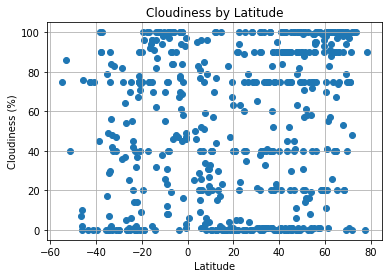

In [10]:
plt.scatter(latitudes, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness by Latitude')
plt.grid(True)
plt.savefig('../Output_Data/lat_cloud.png')

#### Oberservation:
There appears to be some relationship between latitude and cloud cover, but it's not visually very clear.

# Wind speed

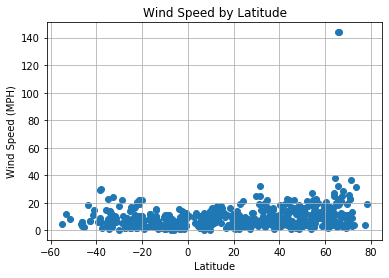

In [11]:
plt.scatter(latitudes, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed by Latitude')
plt.grid(True)
plt.savefig('../Output_Data/wind.png')

#### Oberservation:
There doesn't appear to be a strong relationship between latitude and windspeed.

# Linear Regression

Create Northern and Southern Hemisphere DataFrames

In [12]:
# A function to create linear regression plots
def regress(x, y, hemisphere):
    hem = []
    i = []
    
    # Checks for hemisphere argument ('n' or 's')
    if hemisphere == 'n':
        
        # For every latitude, check if greater than or equal to 0
        for lat in x:
            if lat >= 0:
                
                # Adds values to lists if meets requirement
                hem.append(lat)
                i.append(y[x.index(lat)]) 
                
        coords = (0,10)
    
    # Same, but for the Southern Hemisphere
    if hemisphere == 's':
        for lat in x:
            if lat <= 0:
                hem.append(lat)
                i.append(y[x.index(lat)])

        coords = (-50,20)

                
    # Calculates linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(hem,i)
    hem = np.asarray(hem, dtype=np.float64)
    regress_values = hem * slope + intercept

    # Plots scatter plot and regresion
    plt.scatter(hem,i)
    plt.plot(hem,regress_values,"r-")

    # Annotates graph with equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    
    # Prints r squared value from linregress function
    print(f'The r-squared is: {rvalue}')

# Temperature

The r-squared is: -0.8769372934072963


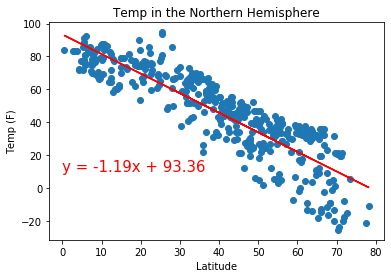

In [13]:
regress(latitudes,temp,'n')
plt.ylabel('Temp (F)')
plt.title('Temp in the Northern Hemisphere')
plt.savefig('../Output_Data/NH_temp.png')

The r-squared is: 0.528758558412413


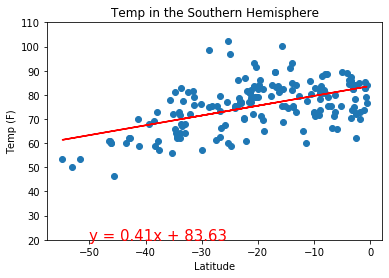

In [14]:
regress(latitudes,temp,'s')
plt.ylim(20,110)
plt.ylabel('Temp (F)')
plt.title('Temp in the Southern Hemisphere')
plt.savefig('../Output_Data/sH_temp.png')

#### Oberservation:
There is a strong relationship between temp and latitude in the Northern Hemisphere than the Southern. 
This could be because there are fewer data points at extreme latitudes. Perhaps if Southern Hemisphere cities that are farther south were represented, the trends would be more similar.  

# Humidity

The r-squared is: 0.318174681691899


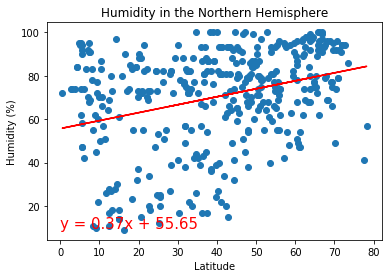

In [15]:
regress(latitudes, humidity, 'n')
plt.ylabel('Humidity (%)')
plt.title('Humidity in the Northern Hemisphere')
plt.savefig('../Output_Data/NH_humidity.png')

The r-squared is: 0.12463596778891554


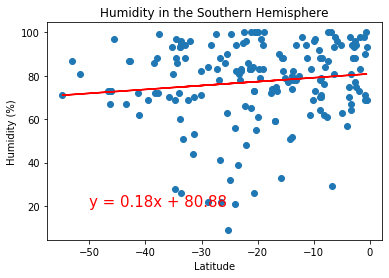

In [16]:
regress(latitudes, humidity, 's')
plt.ylabel('Humidity (%)')
plt.title('Humidity in the Southern Hemisphere')
plt.savefig('../Output_Data/SH_humidity.png')

#### Oberservation:
There there is a slightly positive relationship between latitude and humidity, with humidity increasing toward the equator. Again, the lack of datapoints in the south might be skewing the data on the second graph.

# Cloudiness

The r-squared is: 0.3587622796101217


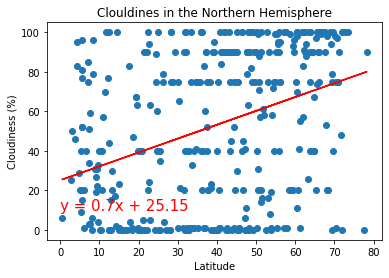

In [17]:
regress(latitudes, clouds , 'n')
plt.ylabel('Cloudiness (%)')
plt.title('Clouldines in the Northern Hemisphere')
plt.savefig('../Output_Data/NH_cloud.png')

The r-squared is: 0.28764163098890194


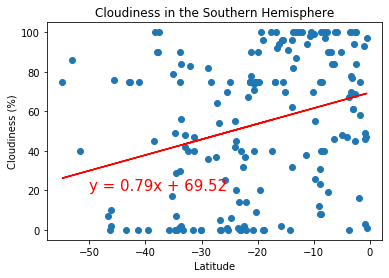

In [18]:
regress(latitudes, clouds , 's')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness in the Southern Hemisphere')
plt.savefig('../Output_Data/SH_cloud.png')

#### Oberservation:
There there is a positive relationship between latitude and cloudiness, with cloudcover increasing toward the equator. This makes sense considering humidity also increases in this manner.

# Wind speed

The r-squared is: 0.21936239090077647


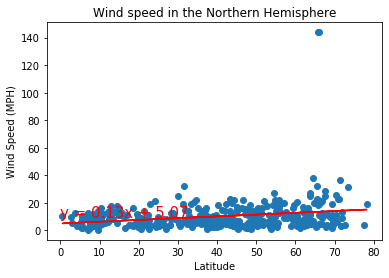

In [19]:
regress(latitudes, wind ,'n')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind speed in the Northern Hemisphere')
plt.savefig('../Output_Data/NH_wind.png')

The r-squared is: -0.2015063419439883


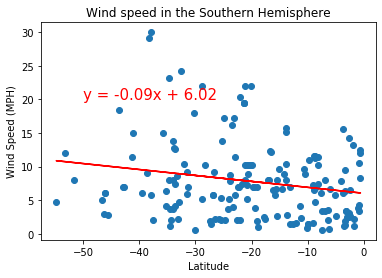

In [20]:
regress(latitudes, wind ,'s')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind speed in the Southern Hemisphere')
plt.savefig('../Output_Data/SH_wind.png')

#### Oberservation:
There there is a slightly positive relationship between latitude and wind speed, with wind speed increasing away from the equator. Perhaps more tropical climates experience less wind.